In [1]:
!pip install translate
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from translate import Translator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("github_issue.csv")

In [3]:
df_unique = df.groupby(['issue_title','body']).first().reset_index()

In [4]:
df.shape

(5332153, 3)

In [5]:
df_unique.shape

(5079568, 3)

In [6]:
df = df_unique.sample(n=20000)

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    # Remove special characters and digits
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Translate to English
    translator = Translator(to_lang="en")
    text = translator.translate(text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)
    return clean_text

df['clean_text'] = df['body'].apply(clean_text)

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [9]:
# Determine optimal number of clusters
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)
    print(k)

optimal_k = np.argmax(scores) + 2 # Add 2 since range starts at 2
print('Optimal number of clusters:', optimal_k)

2
3
4
5
6
7
8
9
Optimal number of clusters: 9


In [10]:
# Run K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

# Add cluster labels to dataframe
df['cluster_label'] = kmeans.labels_

In [11]:
import pickle

# Save the model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [12]:
df['cluster_label'].value_counts()

1    9951
0    3684
4    1427
7    1426
3    1067
6     950
8     791
5     584
2     120
Name: cluster_label, dtype: int64

In [13]:
df[df['cluster_label']==0]

,issue_title,body,issue_url,clean_text,cluster_label
2077934,good for app development?,"perhaps this is a silly question, but do apple...","""https://github.com/magnatronus/tvDemo/issues/1""",perhaps silly question apple approve apps app ...,0
1946790,followup to 123,"better separation of concerns, better encapsul...","""https://github.com/oehf/ipf/issues/135""",better separation concern better encapsulation...,0
4763058,uwp feature request and roadmap?!,"hi, i want to know that whether there is any p...","""https://github.com/PrismLibrary/Prism/issues/...",hi want know whether plan update prismwindows ...,0
101346,a problem about the updater,"hello, i am learning srgan now and i am a begi...","""https://github.com/Nkriskeeic/chainer-srgan/i...",hello learning srgan beginner chainer learnt l...,0
4250853,support for bulma 0.5.1,"hi, can you update to use bulma 0.5.1? thanks.","""https://github.com/rafaelpimpa/buefy/issues/247""",hi update use bulma thanks,0
...,...,...,...,...,...
4184324,store api responses in application for the cal...,at the moment we are not caching any calls. ho...,"""https://github.com/smmtaheri/Twitter-API-Acco...",moment caching call however twitter recommends...,0
2173480,homepage - add sweet alert confirmation after ...,title: message sent successfully alex liverant...,"""https://github.com/alexliv1234/pocketfulweb/i...",title message sent successfully alex liverant ...,0
4326295,tag new release,it would be helpful to create a new release 0....,"""https://github.com/adam12/phoenix_mtm/issues/13""",would helpful create new release everything se...,0
3272481,option to apply the updates,would be nice if there was a --apply option to...,"""https://github.com/gyzerok/elm-outdated/issue...",would nice apply option actually apply update ...,0


In [14]:
df[df['cluster_label']==1]

,issue_title,body,issue_url,clean_text,cluster_label
4425027,there should be submitter name when admin crea...,there is a bug when admin creates a new track....,"""https://github.com/openSUSE/osem/issues/1672""",bug admin creates new track name submitter ie ...,1
977206,class to force volume break,as a convenience instead of using style attrib...,"""https://github.com/nlbdev/pipeline/issues/142""",convenience instead using style attribute atta...,1
200919,add clang switch to cmake,http://stackoverflow.com/questions/7031126/swi...,"""https://github.com/fifengine/fifengine/issues...",httpstackoverflowcomquestionsswitchingbetweeng...,1
1686139,events for contentnegotiation,- onrequest - onresponse - onerror,"""https://github.com/apitte/events/issues/1""",onrequest onresponse onerror,1
2702279,let people submit edited messages by pressing ...,"if the press enter to send option is enabled, ...","""https://github.com/rpnow/rpnow2/issues/42""",press enter send option enabled probably also ...,1
...,...,...,...,...,...
419385,all right. please add me!!!,hello! :wave: please add me as a collaborator ...,"""https://github.com/githubschool/open-enrollme...",hello wave please add collaborator repo thank,1
1378063,dibujado de rutas en viewer,dibujado de rutas almacenadas en la bd de geon...,"""https://github.com/jppasvit/geo-indoor/issues...",dibujado de ruta almacenadas en la bd de geoni...,1
680958,boolean values in plugin admin config page are...,to reproduce - add some config setting to para...,"""https://github.com/newbthenewbd/grav-plugin-t...",reproduce add config setting parameter section...,1
3739156,remove pipeline non-compositing-logic code fro...,necessary for 15934. from https://github.com/s...,"""https://github.com/servo/servo/issues/17200""",necessary httpsgithubcomservoservoissues issue...,1


In [15]:
df[df['cluster_label']==2]

,issue_title,body,issue_url,clean_text,cluster_label
3035372,multirecorder.java line 355,in com.immomo.moment.recorder.multirecorder.sa...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomentrecordermultirecordersavefragme...,2
629764,baseuserprofilefragment.java line 760,in com.immomo.momo.newprofile.fragment.baseuse...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomonewprofilefragmentbaseuserprofile...,2
1973928,friendnoticelistactivity.java line 47,in com.immomo.momo.message.activity.friendnoti...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomomessageactivityfriendnoticelistac...,2
3986533,sessionlistpresenter.java line 161,in com.immomo.momo.maintab.sessionlist.ac.run ...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomomaintabsessionlistacrun number cr...,2
941540,chatactivity.java line 372,in com.immomo.momo.message.activity.chatactivi...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomomessageactivitychatactivityinitad...,2
...,...,...,...,...,...
1300275,dbopenhandler.java line 167,in com.immomo.momo.service.d.c.a number of cra...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomomomoservicedca number crash impacted ...,2
4466597,toolbarhelper.java line 113,in com.immomo.framework.view.toolbar.c.a numbe...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomoframeworkviewtoolbarca number crash i...,2
83321,:com.google.android.gms.dynamitemodulesb@11509...,in tq.a number of crashes: 1 impacted devices:...,"""https://github.com/lstjsuperman/fabric/issues...",tqa number crash impacted device there lot inf...,2
1996617,gameroomactivity.java line 2808,in com.immomo.game.activity.gameroomactivity.t...,"""https://github.com/lstjsuperman/fabric/issues...",comimmomogameactivitygameroomactivitytikingroo...,2


In [16]:
df[df['cluster_label']==3]

,issue_title,body,issue_url,clean_text,cluster_label
2460933,"initial_value must be unicode or none, not str",post the vmcloak install command... vmcloak in...,"""https://github.com/jbremer/vmcloak/issues/120""",post vmcloak install command vmcloak install s...,3
2146914,help debugging python code,"dear @ict4sd community, would anyone have time...","""https://github.com/ICT4SD/Tools4CLEWS/issues/2""",dear ictsd community would anyone time assist ...,3
4289249,svn-username isn't used,the example .ini file includes a svn-username ...,"""https://github.com/toolstack/git-to-wp-plugin...",example ini file includes svnusername httpsgit...,3
2382680,importerror: no module named 'generate_anchors',hello everyone! i've managed to install py_fas...,"""https://github.com/rbgirshick/py-faster-rcnn/...",hello everyone ive managed install pyfasterrcn...,3
3809295,resolve merge issue in file list_streams.php,there is a issue on the following file. seems ...,"""https://github.com/youtube/api-samples/issues...",issue following file seems merge commit httpsg...,3
...,...,...,...,...,...
1754137,failed to open input file 'mer_counts.jf1021',hi! i am trying to calculate octomers in my li...,"""https://github.com/gmarcais/Jellyfish/issues/89""",hi trying calculate octomers library faced wei...,3
3416417,plugin folder name inconsistency,"in windows, the plugin folder name was ..\plug...","""https://github.com/pka/qgpkg/issues/17""",window plugin folder name pluginqgisgeopackage...,3
1804079,feature request: browse google drive trash folder,would be awesome if we could browse the trash ...,"""https://github.com/mmozeiko/RcloneBrowser/iss...",would awesome could browse trash google drive ...,3
1645484,error when installing on arch linux using the aur,> traceback most recent call last : file /usr/...,"""https://github.com/LazoCoder/Pokemon-Terminal...",traceback recent call last file usrbinpokemon ...,3


In [17]:
df[df['cluster_label']==4]

,issue_title,body,issue_url,clean_text,cluster_label
2998121,mounting usb storage on linux doesnt work!,"using linux mint 18, kde plasma verison. when ...","""https://github.com/TheOfficialFloW/VitaShell/...",using linux mint kde plasma verison go mount u...,4
826232,can't initialize character set latin1,it trouble us for a long time . when there are...,"""https://github.com/keplerproject/luasql/issue...",trouble u long time lot connection may error l...,4
2996008,most results in 404 errors on webmd.com,"when i search for anything, if webmd.com is th...","""https://github.com/duckduckgo/zeroclickinfo-g...",search anything webmdcom first result click we...,4
4565077,unable to edit content types from the new angu...,since we made some changes in the rest endpoin...,"""https://github.com/dotCMS/core/issues/13123""",since made change rest endpoint error try edit...,4
683766,border doesn't work with swift 3,hi. am trying to border a view using swift 3 a...,"""https://github.com/facebook/chisel/issues/208""",hi trying border view using swift xcode keep g...,4
...,...,...,...,...,...
65467,377 is an undocumented breaking change,"in strong-mode, object is inferred, not dynami...","""https://github.com/google/quiver-dart/issues/...",strongmode object inferred dynamic following d...,4
1612965,error checking message handler,error check https://github.com/bsnacks000/ipys...,"""https://github.com/bsnacks000/IPySigma-Demo/i...",error check httpsgithubcombsnacksipysigmademob...,4
1621212,error in compiling,"hi, the module gives me the error below, when ...","""https://github.com/firebearstudio/importexpor...",hi module give error try compile fatal error u...,4
4863980,weird error: py-corenlp or corenlp problem?,many thanks for your excellent library! it hel...,"""https://github.com/smilli/py-corenlp/issues/18""",many thanks excellent library helped quite lot...,4


In [18]:
df[df['cluster_label']==5]

,issue_title,body,issue_url,clean_text,cluster_label
2802661,major website enhancement,this includes clearance of a lot of obsolete a...,"""https://github.com/pranav-kural/learn-sdlc/is...",includes clearance lot obsolete redundant code...,5
1150390,couldn't connect to particl daemon,rather than displaying this error on the page ...,"""https://github.com/particl/partgui/issues/122""",rather displaying error page always result shu...,5
4468980,tooltips when not activated cause scrollbars,at least until they are used for the first tim...,"""https://github.com/turt2live/matrix-voyager-b...",least used first time page,5
1059393,complete configuration items,in configuration page of install process some ...,"""https://github.com/pluf/installer-spa/issues/6""",configuration page install process item config...,5
1977700,frontmatter and backmatter pages missing,the copyright and acknowledgements pages in th...,"""https://github.com/sklarjk/sklaraa/issues/10""",copyright acknowledgement page frontmatter gnu...,5
...,...,...,...,...,...
3528283,property page in data catalog,the data catalog should contain a page for eac...,"""https://github.com/konigio/konig-examples/iss...",data catalog contain page property acceptance ...,5
377536,additional blog style pages,i have attempted to make an additional content...,"""https://github.com/devcows/hugo-universal-the...",attempted make additional content page similar...,5
3126503,no auto save in wiki pages,what steps will reproduce the problem? when i ...,"""https://github.com/humhub/humhub/issues/2840""",step reproduce problem write edit wki page mov...,5
4795719,version tag missing in repo,the package's pypi page https://pypi.python.or...,"""https://github.com/carver/ens.py/issues/5""",package pypi page httpspypipythonorgpypiens cu...,5


In [19]:
df[df['cluster_label']==6]

,issue_title,body,issue_url,clean_text,cluster_label
1580835,enforce a minimum width for images in the editor,as mentioned here https://github.com/wordpress...,"""https://github.com/wordpress-mobile/WordPress...",mentioned httpsgithubcomwordpressmobilewordpre...,6
163478,add a image-comments preview in vsc,hi . can you add or exist somthing like this i...,"""https://github.com/Microsoft/vscode/issues/28...",hi add exist somthing like vsc colossal job de...,6
563500,atlas size changing problems,i can't change the size of my images in the at...,"""https://github.com/defold/editor2-issues/issu...",cant change size image atlas doesnt change def...,6
860151,cannot load images,404 error in shop on loading images. cannot fi...,"""https://github.com/Chiefautoparts/MillGeekV2/...",error shop loading image figure,6
1736839,extra space after git branch,issue extra space after git branch is shown wh...,"""https://github.com/denysdovhan/spaceship-zsh-...",issue extra space git branch shown repo clean ...,6
...,...,...,...,...,...
1428208,doc ocf documentation messed up,the table in ocf documentation ocf.md https://...,"""https://github.com/01org/iot-js-api/issues/45""",table ocf documentation ocfmd httpsgithubcomor...,6
2952094,missing support for jpeg2000 images,currently jpeg2000 images are not supported. t...,"""https://github.com/janis91/ocr/issues/65""",currently jpeg image supported file typically ...,6
2673043,lack of retrieve account from owner key in eosc,! image https://user-images.githubusercontent....,"""https://github.com/EOSIO/eos/issues/951""",image httpsuserimagesgithubusercontentcomcdced...,6
456205,always add width attribute to images,expected behaviour an image in the preview pan...,"""https://github.com/pbek/QOwnNotes/issues/808""",expected behaviour image preview panel always ...,6


In [20]:
df[df['cluster_label']==7]

,issue_title,body,issue_url,clean_text,cluster_label
4435490,throttle 1900 and above leads to a reset while...,throttle 1900 and above leads to a reset while...,"""https://github.com/betaflight/betaflight/issu...",throttle lead reset stuck full deflection roll...,7
4581388,unable to use in ionic for ios platform,"warning: if you ignore this template, we'll ig...","""https://github.com/katzer/cordova-plugin-loca...",warning ignore template well ignore issue must...,7
2282338,https://ssp.tntech.edu/ - incorrect blocking,https://ssp.tntech.edu/showlogin.cc adguard bl...,"""https://github.com/AdguardTeam/AdguardFilters...",httpsssptntechedushowlogincc adguard block log...,7
4985122,x/sys: sys___sysctl is not defined on darwin/arm,what version of go are you using go version ? ...,"""https://github.com/golang/go/issues/22839""",version go using go version go version go darw...,7
4621537,unused-argument false-positive with overshadow...,steps to reproduce python def metadata_from_di...,"""https://github.com/PyCQA/pylint/issues/1731""",step reproduce python def metadatafromdict key...,7
...,...,...,...,...,...
953945,checkboxes inside submenus doesn't allow you t...,description <!--- tell us what happens and wha...,"""https://github.com/handsontable/handsontable/...",description tell u happens happen written foru...,7
4897048,when you delete the stack，the container in the...,rancher versions: rancher/server: v1.6.2 ranch...,"""https://github.com/rancher/rancher/issues/9300""",rancher version rancherserver v rancheragent v...,7
4692895,usage of two fonts,bug report - __package version s __: 1.11.1 - ...,"""https://github.com/palantir/blueprint/issues/...",bug report package version browser o version c...,7
2803632,make a 5.6 compatible version,the current project implements features from p...,"""https://github.com/fhmj/pdo-extended/issues/2""",current project implement feature php spinoff ...,7


In [21]:
df[df['cluster_label']==8]

,issue_title,body,issue_url,clean_text,cluster_label
2653230,keyboard hides after tap on return instead of ...,description type : bug summary : on sign in sc...,"""https://github.com/status-im/status-react/iss...",description type bug summary sign screen user ...,8
3635538,ravello user accounts not created,currently the script fails while trying to cre...,"""https://github.com/tombatchelor/AppDynamics-1...",currently script fails trying create user acco...,8
3962169,send additional data / payload,is it possible to send additional data with th...,"""https://github.com/laravel-notification-chann...",possible send additional data push message bes...,8
4550635,ui is a bit confusing,"the header text, to the left of the map, says ...","""https://github.com/jmsaenz5/project-1-group-5...",header text left map say click one info make e...,8
1060829,complete user schedule flow,create the rest of the user schedule flow from...,"""https://github.com/jonathanpchan/openclassroo...",create rest user schedule flow view add delete,8
...,...,...,...,...,...
1366488,determine past sentencing and convictions,"after determining who is guilty, come up with ...","""https://github.com/Drakonnaskaiba/AI_Project/...",determining guilty come proper sentencing ask ...,8
1797744,feature request transmission-qt open remote fo...,i believe this was a report on the old tracker...,"""https://github.com/transmission/transmission/...",believe report old tracker cant find anymore w...,8
4849634,web club quiz maker,the idea is to write a quiz maker terminal bas...,"""https://github.com/WebClub-NITK/Hacktoberfest...",idea write quiz maker terminal based mostly re...,8
3964552,send quarantaine report,"when we click on send now , we got this messag...","""https://github.com/mailwatch/MailWatch/issues...",click send got message capture ecran httpsclou...,8


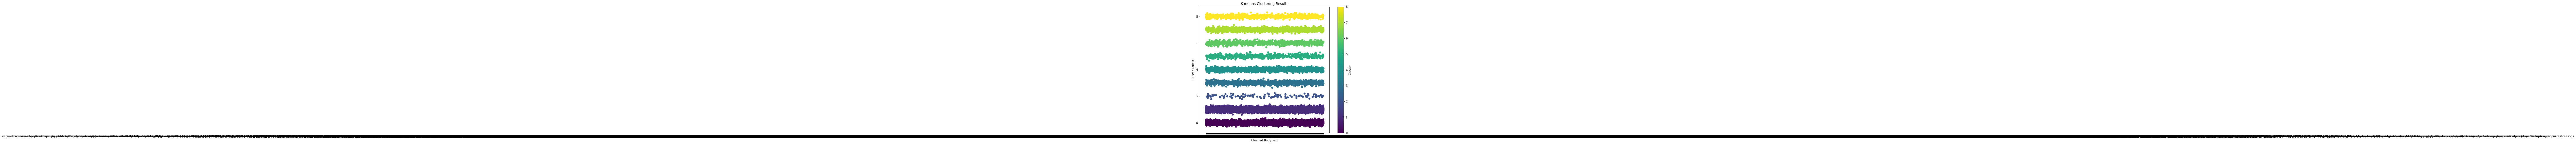

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
jitter = np.random.normal(0, 0.1, size=len(df))
# Scatter plot with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot with different colors for each cluster
scatter = ax.scatter(df['clean_text'], df['cluster_label'] + jitter, c=df['cluster_label'])

# Set the x and y axis labels and title
ax.set_xlabel('Cleaned Body Text')
ax.set_ylabel('Cluster Labels')
ax.set_title('K-means Clustering Results')

# Add colorbar legend
cb = plt.colorbar(scatter)
cb.set_label('Cluster')

plt.show()
